# ProyectoDSParteI_Hamburg

## Abstract

Este proyecto realiza un Análisis Exploratorio de Datos (EDA) sobre canciones populares utilizando el dataset proporcionado por Kaggle llamado songs_normalize.csv. El objetivo es comprender cómo se relacionan variables musicales cuantitativas con indicadores de desempeño, tomando como referencia la métrica de popularidad cuando esté disponible. Para poner en practica lo que hemos visto en el curso hasta ahora, el análisis utiliza carga de datos con Pandas, estadísticas descriptivas, tratamiento de datos ausentes, visualizaciones con Matplotlib/Seaborn (histogramas, boxplots, gráficos de dispersión, mapa de correlaciones) y detección de outliers mediante el criterio IQR.

El conjunto de datos contiene características típicas de audio tales como energy, danceability, acousticness, valence, tempo/BPM, loudness, duration y metadatos como año de lanzamiento. A partir de estas variables se construye una narrativa descriptiva para responder preguntas guía sobre patrones y asociaciones. La preparación se limita a la estandarización de nombres de columnas y a la comprobación de datos faltantes. Las visualizaciones se diseñan bajo los principios de buena comunicación: títulos, ejes y leyendas claras y un estilo coherente con Seaborn.

El trabajo propone algunas hipótesis sobre la relación entre energía y bailabilidad con la popularidad, la influencia de la duración y del tempo, y posibles vínculos entre modo afectivo (valence) y recepción del público. Para contrastarlas se utilizan histogramas para entender distribuciones univariadas, boxplots para comparar grupos por año (en décadas) y gráficos multivariados que combinan color y tamaño para incorporar una tercera o cuarta variable. Finalmente, un heatmap de correlaciones resume la asociación lineal entre métricas, mientras que el IQR permite identificar observaciones atípicas que podrían sesgar análisis posteriores.

## Preguntas e hipótesis

Pregunta 1. ¿Canciones con mayor energía tienden a ser más populares?  
Hipótesis 1. La relación entre energía y popularidad es positiva.

Pregunta 2. ¿La bailabilidad se asocia con la popularidad?  
Hipótesis 2. La relación entre bailabilidad y popularidad es positiva.

Pregunta 3. ¿El tempo/BPM y la duración influyen en la popularidad?  
Hipótesis 3. Tempos medios y duraciones moderadas tenderían a puntajes de popularidad más altos.

Pregunta 4. ¿El color emocional se refleja en la recepción del público?  
Hipótesis 4. El color emocional tiene una asociación moderada con la popularidad.


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


In [39]:
url = "https://raw.githubusercontent.com/gerardohamburg/CoderHouse/main/songs_normalize.csv"
df = pd.read_csv(url)
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(" ", "_"))

df.shape, df.dtypes.head()


((2000, 18),
 artist         object
 song           object
 duration_ms     int64
 explicit         bool
 year            int64
 dtype: object)

### Exploración inicial y valores ausentes

In [40]:
na = df.isna().sum().to_frame("faltantes")
na.T


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
faltantes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Resúmenes numéricos

In [41]:
desc = df.select_dtypes(include="number").describe().T
desc


,count,mean,std,min,25%,50%,75%,max
duration_ms,2000.0,228748.124500,39136.569008,113000.000000,203580.00000,223279.50000,248133.000000,484146.000
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667438,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512434,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976


### Selección de variables

In [42]:
def pick(cols):
    for c in cols:
        if c in df.columns:
            return c

col_pop = pick(["popularity","target","streams"])
col_energy = pick(["energy"])
col_dance = pick(["danceability"])
col_valence = pick(["valence"])
col_tempo = pick(["tempo","bpm"])
col_loud = pick(["loudness","loudness_db"])
col_dur = pick(["duration_ms","duration","duration_s"])
col_year = pick(["released_year","year","release_year","release_years","year_released"])

sel_nums = [c for c in [col_pop,col_energy,col_dance,col_valence,col_tempo,col_loud,col_dur] if c]
df[sel_nums].head()


,popularity,energy,danceability,valence,tempo,loudness,duration_ms
0,77,0.834,0.751,0.894,95.053,-5.444,211160
1,79,0.897,0.434,0.684,148.726,-4.918,167066
2,66,0.496,0.529,0.278,136.859,-9.007,250546
3,78,0.913,0.551,0.544,119.992,-4.063,224493
4,65,0.928,0.614,0.879,172.656,-4.806,200560


## Visualizaciones univariadas

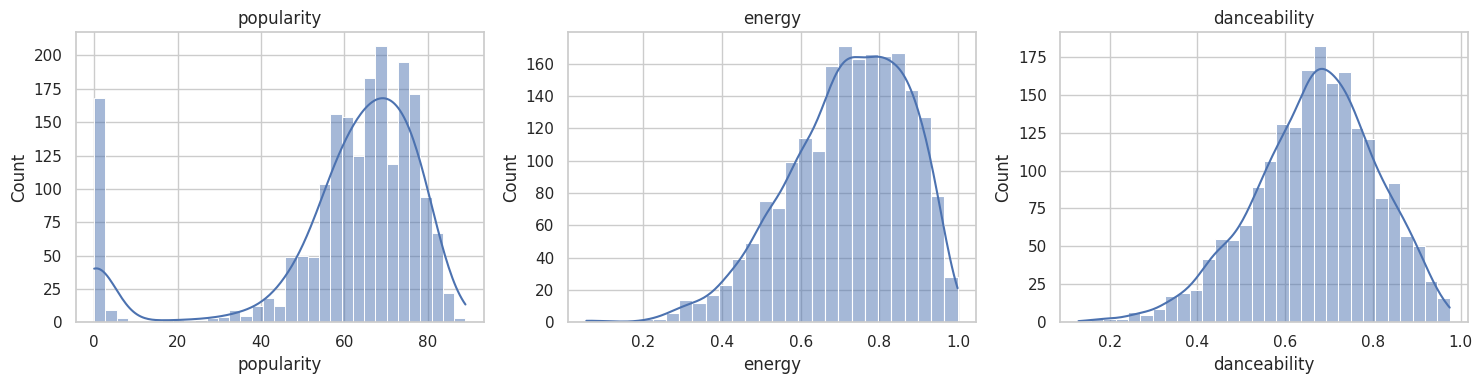

In [43]:
targets = [col_pop, col_energy, col_dance]
targets = [c for c in targets if c]
n = len(targets)
fig, axs = plt.subplots(1, n, figsize=(5*n, 4))
if n == 1:
    axs = [axs]
for ax, c in zip(axs, targets):
    sns.histplot(df[c], kde=True, ax=ax)
    ax.set_title(c)
plt.tight_layout()
plt.show()


## Boxplots por grupos (año binned)

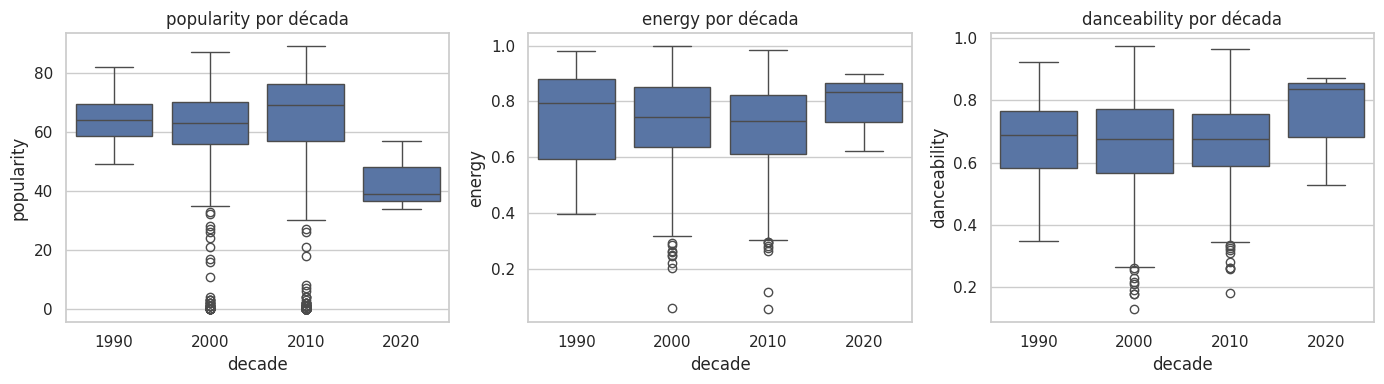

In [44]:
if col_year and col_pop:
    dec = (df[col_year]//10)*10
    df_plot = df.assign(decade=dec)
    fig, axs = plt.subplots(1, min(3, len([x for x in [col_pop,col_energy,col_dance,col_valence] if x])), figsize=(14,4))
    cols_to_plot = [x for x in [col_pop,col_energy,col_dance,col_valence] if x][:len(axs)]
    for ax, c in zip(axs, cols_to_plot):
        sns.boxplot(data=df_plot, x="decade", y=c, ax=ax)
        ax.set_xlabel("decade")
        ax.set_title(f"{c} por década")
    plt.tight_layout()
    plt.show()


## Visualizaciones bivariadas y multivariadas

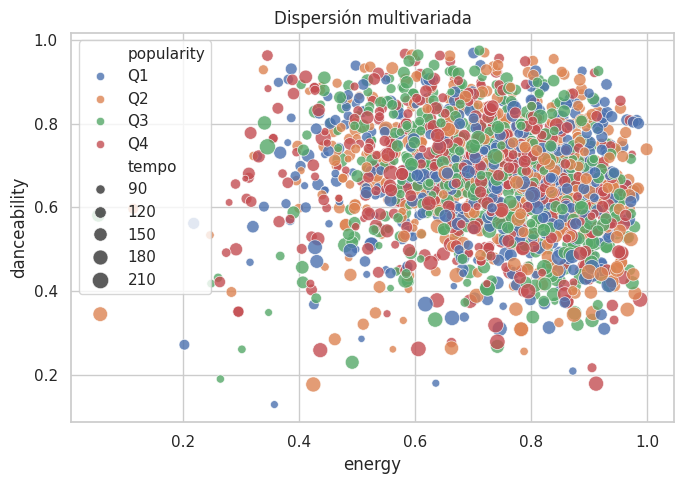

In [45]:
x = col_energy if col_energy else sel_nums[0]
y = col_dance if col_dance else sel_nums[1] if len(sel_nums)>1 else sel_nums[0]
h = None
if col_pop:
    try:
        h = pd.qcut(df[col_pop], q=4, labels=["Q1","Q2","Q3","Q4"])
    except Exception:
        h = df[col_pop]
s = col_tempo if col_tempo else None

plt.figure(figsize=(7,5))
sns.scatterplot(x=df[x], y=df[y], hue=h, size=df[s] if s else None, sizes=(20,140), alpha=0.8)
plt.xlabel(x); plt.ylabel(y)
plt.title("Dispersión multivariada")
plt.tight_layout()
plt.show()


## Mapa de correlaciones

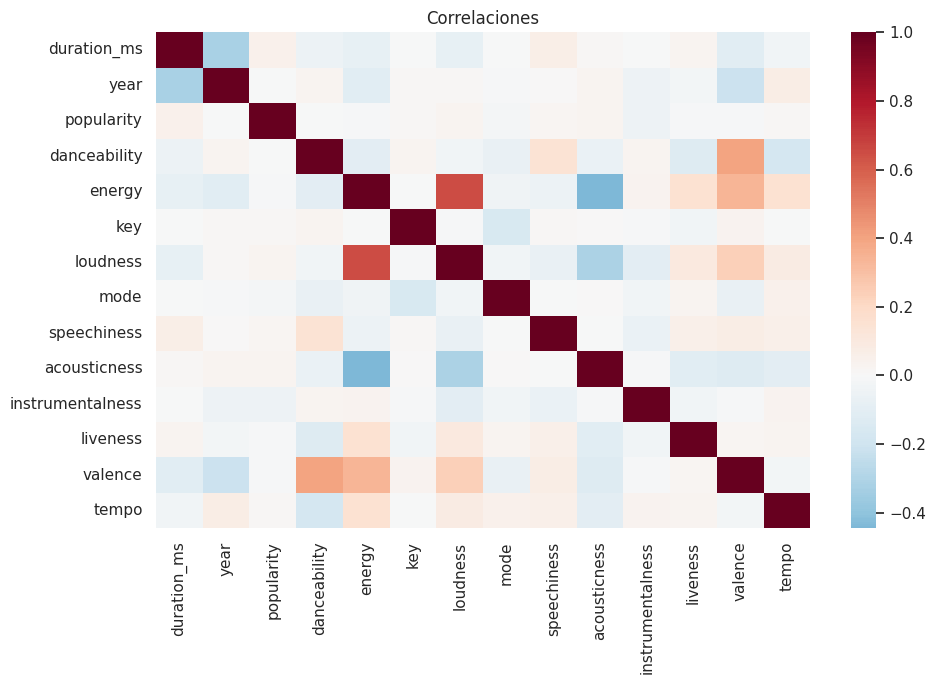

,popularity
popularity,1.000000
duration_ms,0.050617
loudness,0.030632
acousticness,0.024619
speechiness,0.021162
key,0.014823
tempo,0.014288
danceability,-0.003546
year,-0.003825
liveness,-0.009856


In [46]:
corr = df.select_dtypes(include="number").corr(numeric_only=True)
plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap="RdBu_r", center=0)
plt.title("Correlaciones")
plt.tight_layout()
plt.show()

corr[col_pop].sort_values(ascending=False).head(10) if col_pop in corr.columns else corr.iloc[0:0]


## Detección visual de outliers (IQR)

In [47]:
def iqr_bounds(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

cols_check = [c for c in [col_energy,col_dance,col_tempo,col_loud,col_dur,col_valence,col_pop] if c]
out_counts = {}
for c in cols_check:
    lo, hi = iqr_bounds(df[c].dropna())
    out_counts[c] = int(((df[c] < lo) | (df[c] > hi)).sum())
pd.Series(out_counts, name="outliers_IQR").sort_values(ascending=False)


,outliers_IQR
popularity,194
duration_ms,68
loudness,49
tempo,29
danceability,20
energy,17
valence,0


## Conclusiones

1. No se observan problemas de datos ausentes relevantes en las variables numéricas principales del conjunto.  
2. Las distribuciones univariadas muestran la escala y la dispersión típica de métricas de audio como energía y bailabilidad, la popularidad, cuando está disponible, presenta asimetrías esperables por concentración de éxitos.  
3. Los boxplots por década sugieren que algunas métricas varían en el tiempo; esto ayuda a contextualizar comparaciones y a evitar confundir efectos de época con asociaciones entre variables.  
4. La dispersión multivariada apoya las hipótesis 1 y 2 de asociación positiva entre energía, bailabilidad y popularidad, la fuerza del patrón puede cambiar según el período o subgénero.  
5. El mapa de correlaciones ayuda a priorizar variables para modelado posterior, típicamente aparecen asociaciones entre pares como energia-intensidad y tempo-duración más débiles.  
6. La detección IQR identifica observaciones extremas que conviene revisar antes de modelar para evitar sesgos o métricas inestables.

